## Imports

In [126]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [127]:
df = pd.read_json(r'./restaurant_prices.json')
df = df.transpose()
df = df.iloc[:, [1,0]]

## Data Info

In [128]:
df.head(5)

,city_name,price
0,Barcelona,15.0
1,Barcelona,11.5
2,Valencia,15.0
3,Barcelona,15.8
4,Barcelona,70.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15246 entries, 0 to 15245
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city_name  15246 non-null  object
 1   price      15246 non-null  object
dtypes: object(2)
memory usage: 873.4+ KB


In [130]:
df.describe()

,city_name,price
count,15246,15246.0
unique,2,594.0
top,Barcelona,15.0
freq,11029,1428.0


## Statistics

### Compute Mean

In [131]:
bcn_df = df[df['city_name'] == 'Barcelona']
mean = bcn_df['price'].mean()

print(f"Average restaurant price in Barcelona: \n -> {round(mean,2)} euros/meal")

Average restaurant price in Barcelona: 
 -> 21.41 euros/meal


### Plots

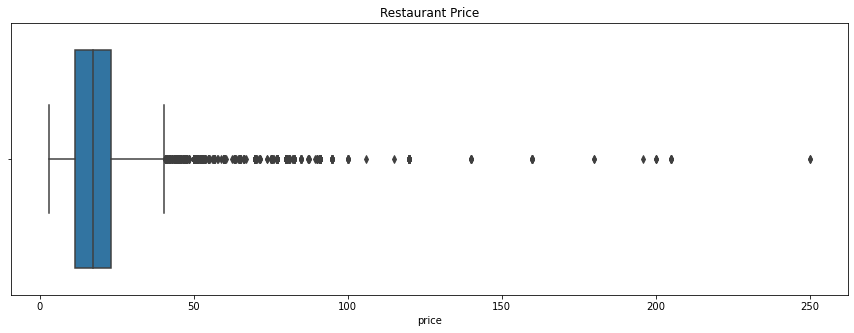

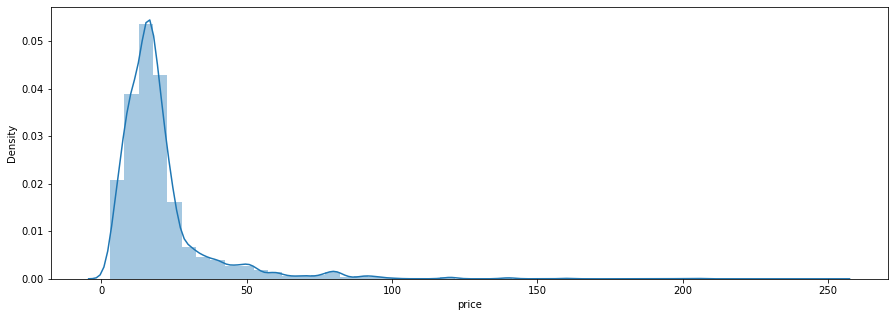

In [132]:
plt.rcParams['figure.figsize']=(15,5)
sn.boxplot(x="price", data=bcn_df).set_title('Restaurant Price');
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sn.distplot(df['price'])
plt.show()

We clearly only have outliers in the expensive restaurants side. (See black dots in the boxplot)
In spite of the fact that statistically we have a big amount of outliers, the data is probably correct, because there exists a lot of expensive restaurants in Barcelona, but they are a minority in front the group of regular ones.

In order to remove the outliers, we are going to determine a threshold and trim de dataset according to it. We are going to play with this limit, trying to determine the exact quantile value that drops the extreme values.

Upper-limit = 91.0 euros/meal
There are 86 over the upper-limit


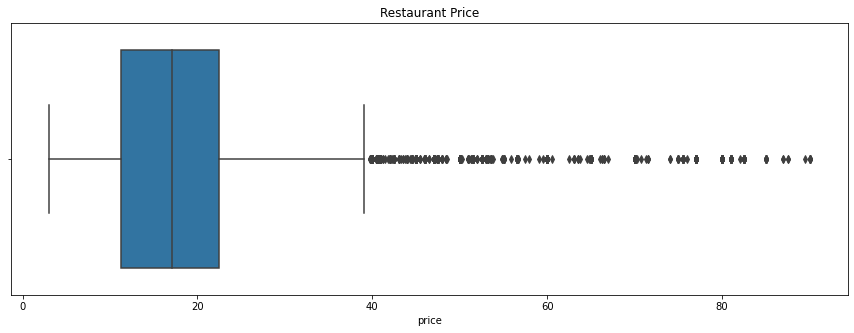

In [133]:
alpha = 0.01
upper_limit = bcn_df['price'].quantile(1 - alpha)
N_over_upper = len(bcn_df[bcn_df['price'] > upper_limit])

print(f"Upper-limit = {round(upper_limit, 2)} euros/meal")
print(f"There are {N_over_upper} over the upper-limit")

plt.rcParams['figure.figsize']=(15,5)
sn.boxplot(x="price", data=bcn_df[bcn_df['price'] < upper_limit]).set_title('Restaurant Price');

We continue having a big amount of outliers. Let's try to increase the alpha value.

Upper-limit = 35.4 euros/meal
There are 1346 over the upper-limit


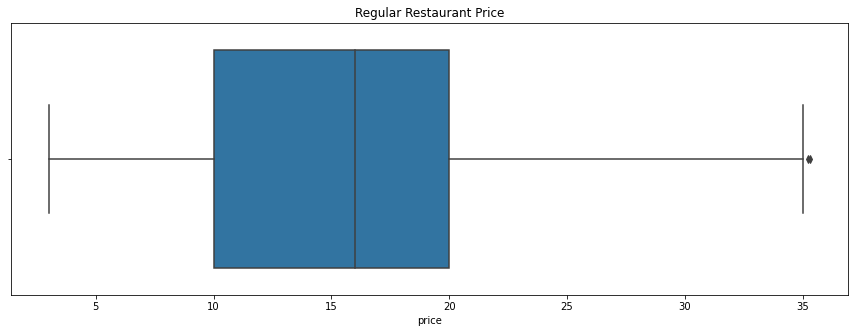

In [134]:
alpha = 0.124

upper_limit = bcn_df['price'].quantile(1 - alpha)
N_over_upper = len(bcn_df[bcn_df['price'] > upper_limit])

print(f"Upper-limit = {round(upper_limit, 2)} euros/meal")
print(f"There are {N_over_upper} over the upper-limit")

plt.rcParams['figure.figsize']=(15,5)
sn.boxplot(x="price", data=bcn_df[bcn_df['price'] < upper_limit]).set_title('Regular Restaurant Price');

With a value of alpha = 0.124, we have just a couple of outliers. By just increasing the alpha value to 0.1245, we are able to discard all the outlier values with a total upper-limit of 35.25 euros/meal.

Upper-limit = 35.25 euros/meal
There are 1373 over the upper-limit


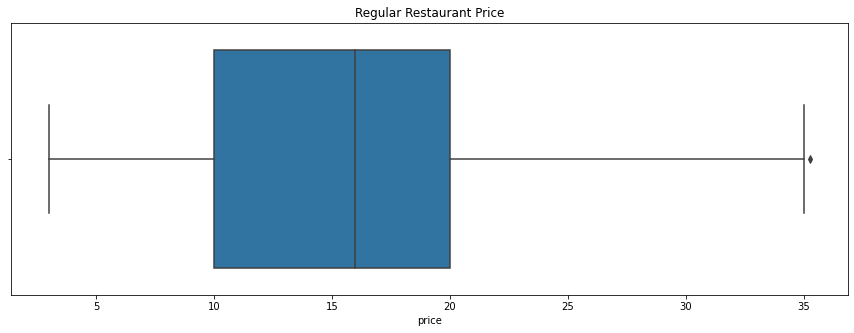

In [135]:
alpha = 0.1245

upper_limit = bcn_df['price'].quantile(1 - alpha)
N_over_upper = len(bcn_df[bcn_df['price'] > upper_limit])

print(f"Upper-limit = {round(upper_limit, 2)} euros/meal")
print(f"There are {N_over_upper} over the upper-limit")

plt.rcParams['figure.figsize']=(15,5)
sn.boxplot(x="price", data=bcn_df[bcn_df['price'] < upper_limit]).set_title('Regular Restaurant Price');


### Extra
It is also curious that, given the big amount of discarded restaurants (the expensive ones), we are able to generate another little dataset with them.

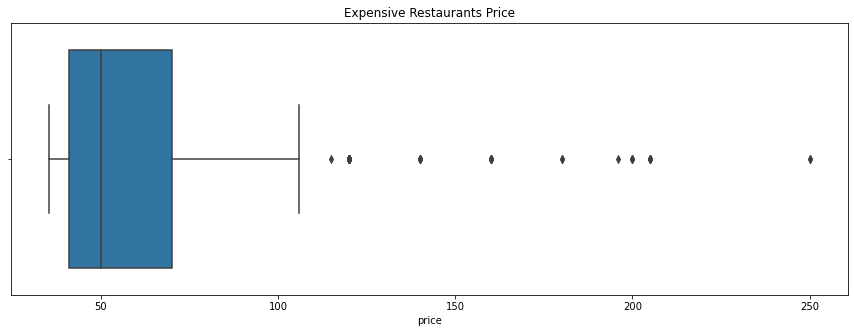

In [136]:
outlier_bcn_df = bcn_df[bcn_df['price'] > upper_limit]
outlier_bcn_df.describe()
sn.boxplot(x="price", data=outlier_bcn_df).set_title('Expensive Restaurants Price');